# 

In [23]:
# 1) Install and load the syuzhet and other appropriate libraries
#install.packages("syuzhet")
#install.packages("text")
#install.packages("lsa")
library(syuzhet)
library(zoo)
library(ggplot2)
library(dplyr)
library(text)
library(lsa)

In [24]:
# 2) Load the three hotel reviews datasets into data frames.
hotel1 <- read.csv("R-hotel1 (1).csv", stringsAsFactors = FALSE)
hotel2 <- read.csv("R-hotel2 (1).csv", stringsAsFactors = FALSE)
hotel3 <- read.csv("R-hotel3 (1).csv", stringsAsFactors = FALSE)


In [25]:
# 3) Explore and clean the data.
cat("\nSummary of Hotel 1 (40 Berkeley Hostel):\n")
summary(hotel1)
cat("\nMissing values in Hotel 1 (40 Berkeley Hostel):\n")
print(sapply(hotel1, function(x) sum(is.na(x))))
             
cat("\nSummary of Hotel 2 (A Bed & Breakfast In Cambridge):\n")
summary(hotel2)
cat("\nMissing values in Hotel 2 (A Bed & Breakfast In Cambridge):\n")
print(sapply(hotel2, function(x) sum(is.na(x))))
             
cat("\nSummary of Hotel 3 (Ambassadors Inn and Suites):\n")
summary(hotel3)
cat("\nMissing values in Hotel 3 (Ambassadors Inn and Suites):\n")
print(sapply(hotel3, function(x) sum(is.na(x))))

# Cleaning the text data by converting to lowercase, removing punctuation, removing stop words, and stemming or lemmatizing can negatively impact the effectiveness of functions like get_sentences() and get_sentiment() from the syuzhet package. For this reason, none of these cleaning steps were done before splitting the text into sentences and extracting the sentiment. 


Summary of Hotel 1 (40 Berkeley Hostel):


    Hotel             Reviews         
 Length:161         Length:161        
 Class :character   Class :character  
 Mode  :character   Mode  :character  


Missing values in Hotel 1 (40 Berkeley Hostel):
  Hotel Reviews 
      0       0 

Summary of Hotel 2 (A Bed & Breakfast In Cambridge):


    Hotel             Reviews         
 Length:54          Length:54         
 Class :character   Class :character  
 Mode  :character   Mode  :character  


Missing values in Hotel 2 (A Bed & Breakfast In Cambridge):
  Hotel Reviews 
      0       0 

Summary of Hotel 3 (Ambassadors Inn and Suites):


    Hotel             Reviews         
 Length:104         Length:104        
 Class :character   Class :character  
 Mode  :character   Mode  :character  


Missing values in Hotel 3 (Ambassadors Inn and Suites):
  Hotel Reviews 
      0       0 


In [26]:
# 4) Convert each set of reviews into sets of sentences using the get_sentences()
sentences_hotel1 <- get_sentences(hotel1$Review)
sentences_hotel2 <- get_sentences(hotel2$Review)
sentences_hotel3 <- get_sentences(hotel3$Review)


In [27]:
# 5) Verify the output of the last step.
cat("\nFirst 10 Sentences of Hotel 1 (40 Berkeley Hostel):\n")
head(sentences_hotel1, 10)

cat("\nFirst 10 Sentences of Hotel 2 (A Bed & Breakfast In Cambridge):\n")
head(sentences_hotel2, 10)

cat("\nFirst 10 Sentences of Hotel 3 (Ambassadors Inn and Suites):\n")
head(sentences_hotel3, 10)



First 10 Sentences of Hotel 1 (40 Berkeley Hostel):


[1] "We booked this hostel because it was the cheapest place in the Center area in boston."             
 [2] "When we got there there was a mixup with our reservation and they took care of it right away."     
 [3] "Excellent customer service at the front desk, very polite and helpful, answered all our questions."
 [4] "The room was a twin on the sixth floor, very..."                                                   
 [5] "More"                                                                                              
 [6] "Good place to stay for a few days."                                                                
 [7] "Clean rooms, helping staff and clean bathrooms."                                                   
 [8] "The common area is nice and fun with a pool table and a small cinema room."                        
 [9] "Its the best you can get in Boston for this price."                                                
[10] "Good place as well."


First 10 Sentences of Hotel 2 (A Bed & Breakfast In Cambridge):


[1] "Breakfast was the best, and the best thing about the stay was the one and only host, great conversations at breakfast and advise on the city."    
 [2] "Very nice neighborhood."                                                                                                                          
 [3] "Only reason that it did not get 5 stars is that the room has room for improvement, not any fault of the host."                                    
 [4] "This is bed and breakfast, but not your honeymoon style BB, I would stay here again."                                                             
 [5] "Room comfort could improve with a new air conditioning unit, other then that five stars."                                                         
 [6] "Sharing the bathroom, never a problem, and coming in and out with you wanted never a problem."                                                    
 [7] "No need to rent a car, easy with public transportation."                                                                                          
 [8] "A nice BB really close to Harvard Square."                                                                                                        
 [9] "A little confusing getting there if your walking (very little to no street signs) but ultimately a call to the BB saved me from wondering around."
[10] "Quiet neighborhood, bed was comfortable and bathroom was good considering that this is a very old building so keep that in mind."


First 10 Sentences of Hotel 3 (Ambassadors Inn and Suites):


[1] "Relaxing."                                                         
 [2] "Nice and peaceful."                                                
 [3] "Room could use upgrades."                                          
 [4] "It is not walking distance to beach."                              
 [5] "better to pay the extra to stay closer to beach and restaurants."  
 [6] "The hotel was great for our stay."                                 
 [7] "It was a couples trip for beach week."                             
 [8] "The only things I didn't like was the cleanliness of the bathroom."
 [9] "And as a women that's a big part of staying in the hotel"          
[10] "Not a bad stay , hotel could use a remodel."

In [28]:
# 6) Build the sentiment analysis model.
# Extract sentiments for each hotel using the get_sentiment()
sentiment_hotel1 <- get_sentiment(sentences_hotel1)
sentiment_hotel2 <- get_sentiment(sentences_hotel2)
sentiment_hotel3 <- get_sentiment(sentences_hotel3)


In [29]:
# Examine the first 10 values (sentences) in each of the resulting numeric vectors for each hotel.
cat("\nFirst 10 Sentiment Values for Hotel 1 (40 Berkeley Hostel):\n")
print(sentiment_hotel1[1:10])

cat("\nFirst 10 Sentiment Values for Hotel 2 (A Bed & Breakfast In Cambridge):\n")
print(sentiment_hotel2[1:10])

cat("\nFirst 10 Sentiment Values for Hotel 3 (Ambassadors Inn and Suites):\n")
print(sentiment_hotel3[1:10])


# What are the most positive and the most negative sentences for each hotel (among the first 10 sentences)? Explain.
#After extracting sentences, get_sentiment() is applied to each sentence. This function calculates a sentiment score for each sentence, indicating whether the sentiment is positive, negative, or neutral. Positive values indicate positive sentiment, negative values indicate negative sentiment, and values close to zero indicate neutral sentiment. For each hotel the most positive and most negative values in the first 10 sentences were as shown below. If a hotel did not have a negative value in its first 10 sentences, then the least positive value was given.
#Hotel 1: 40 Berkeley Hostel
#•	Most Positive Sentiment Value: 2.25
#•	Most Negative Sentiment Value: 0.00
#Hotel 2: A Bed & Breakfast In Cambridge
#•	Most Positive Sentiment Value: 2.40
#•	Most Negative Sentiment Value: -0.75
#Hotel 3: Ambassadors Inn and Suites
#•	Most Positive Sentiment Value: 1.25
#•	Most Negative Sentiment Value: -0.65



First 10 Sentiment Values for Hotel 1 (40 Berkeley Hostel):
 [1] 0.25 1.80 2.25 0.25 0.00 0.75 1.25 1.25 0.50 1.55

First 10 Sentiment Values for Hotel 2 (A Bed & Breakfast In Cambridge):
 [1]  2.40  0.50  0.85  1.40  2.30 -0.75  0.80  0.50  0.30  1.60

First 10 Sentiment Values for Hotel 3 (Ambassadors Inn and Suites):
 [1]  0.00  1.25  0.00  0.00  1.10  0.50  0.00  1.00  0.25 -0.65


In [30]:
# Calculate measures of central tendencies for each hotel's reviews, then summarize your findings and their meaning.
cat("\nSummary of All Sentences Sentiment Values for Hotel 1 (40 Berkeley Hostel):\n")
summary(sentiment_hotel1)

cat("\nSummary of All Sentences Sentiment Values for Hotel 2 (A Bed & Breakfast In Cambridge):\n")
summary(sentiment_hotel2)

cat("\nSummary of All Sentences Sentiment Values for Hotel 3 (Ambassadors Inn and Suites):\n")
summary(sentiment_hotel3)
# Summary of Findings: The sentiment analysis conducted on the reviews for the three hotels, 40 Berkeley Hostel, A Bed & Breakfast In Cambridge, and Ambassadors Inn and Suites, provides insights into the overall customer sentiment and the variability of sentiment expressed in the reviews. The measures of central tendencies calculated for each hotel reveal differences in the range and distribution of sentiments among the hotels.
# For 40 Berkeley Hostel (Hotel 1), the sentiment scores range from -4.00 to 4.15, indicating a broad spectrum of reviews with both highly positive and highly negative sentiments. The mean sentiment of 0.4689 suggests that, on average, the reviews lean slightly positive, but the presence of a low minimum score indicates some strongly negative reviews. The wide range in sentiment values suggests a mixed experience for guests, with both very positive and very negative reviews. Efforts should be focused on addressing the negative feedback to improve overall guest satisfaction.
# A Bed & Breakfast In Cambridge (Hotel 2) has a sentiment range from -1.25 to 5.20. The relatively high mean sentiment of 0.6461 and the maximum score of 5.20 suggest that the hotel generally receives more positive reviews compared to the others. The sentiments are more positively skewed, indicating that most guests had a more favorable experience. The higher average sentiment and the high maximum value suggest that this hotel is performing relatively well, with many guests having a positive experience. Management should continue current practices and consider leveraging the positive reviews in marketing strategies.
# Ambassadors Inn and Suites (Hotel 3) shows sentiment scores ranging from -3.00 to 3.45. The mean sentiment is the lowest among the three hotels at 0.2888, suggesting that the reviews are relatively less positive overall. The lower third quartile and maximum values also imply that this hotel might have fewer strongly positive reviews compared to the other two hotels. The lower mean sentiment indicates that guest satisfaction may be lower at this hotel. Management should investigate the causes of negative reviews and work on areas of improvement to enhance the guest experience.


# Since the results of this analysis are actionable items, the model calculates the ratio of positive to negative. There are other sentiment analysis data, in which neutral sentiments are valuable, like those expressed towards an artist or a politician. Does your model calculate neutral sentiments as well? If yes, how are you processing these results? If not, why not?
# Yes, this model captures neutral sentiments in addition to negative and positive ones. Including neutral sentiments is important for achieving a more granular and nuanced understanding of the overall sentiment distribution. Neutral sentiments provide valuable insights, especially when the sentiment isn't strongly polarized.
# In this model, sentiment values close to zero are considered neutral. Based on the summary statistics for each hotel, sentiment scores ranged from approximately -4.0 on the lower end to around 5.2 on the upper end. The first quartile for all hotels was consistently 0.0, while the third quartile hovered around 1.0.
# Given these patterns, we can classify sentiment scores below -1.0 as negative, those above 1.0 as positive, and values between -1.0 and 1.0 as neutral. This classification allows for a straightforward and consistent way to interpret the sentiment of each review, ensuring that moderate opinions are captured accurately as neutral rather than being lumped into either the positive or negative categories. If more granularity is needed, additional cutoff levels could be introduced. For example, scores between -1 and -2 could be classified as somewhat negative, while scores between 1 and 2 could be considered somewhat positive. Values beyond these ranges would then be categorized as strongly negative or strongly positive.



Summary of All Sentences Sentiment Values for Hotel 1 (40 Berkeley Hostel):


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.0000  0.0000  0.2500  0.4689  0.8500  4.1500 


Summary of All Sentences Sentiment Values for Hotel 2 (A Bed & Breakfast In Cambridge):


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.2500  0.0000  0.5000  0.6461  1.2500  5.2000 


Summary of All Sentences Sentiment Values for Hotel 3 (Ambassadors Inn and Suites):


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0000  0.0000  0.1000  0.2888  0.7500  3.4500 

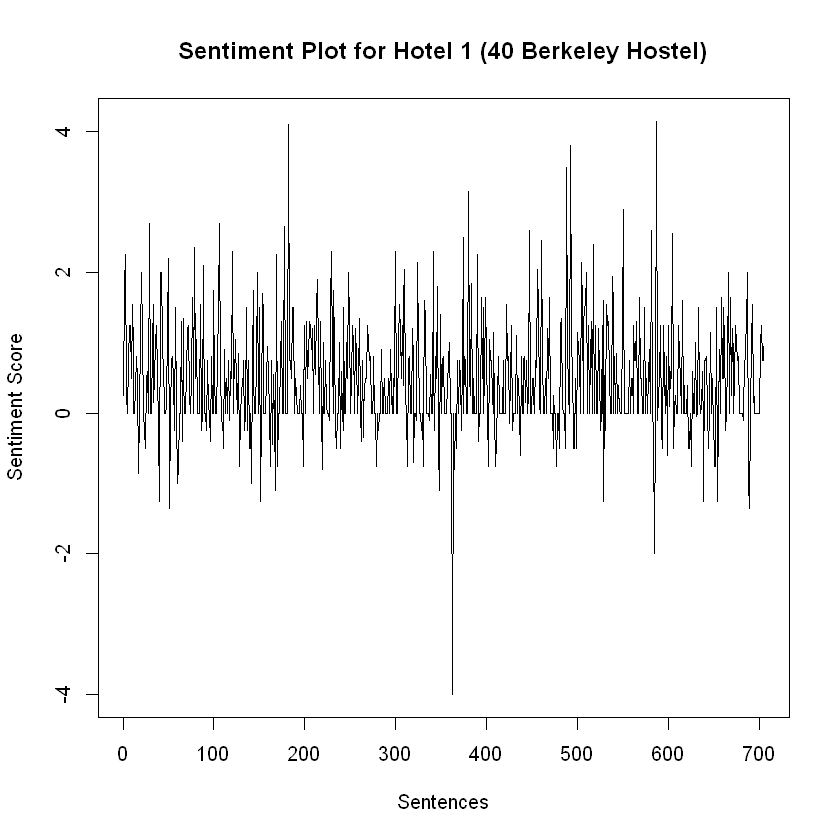

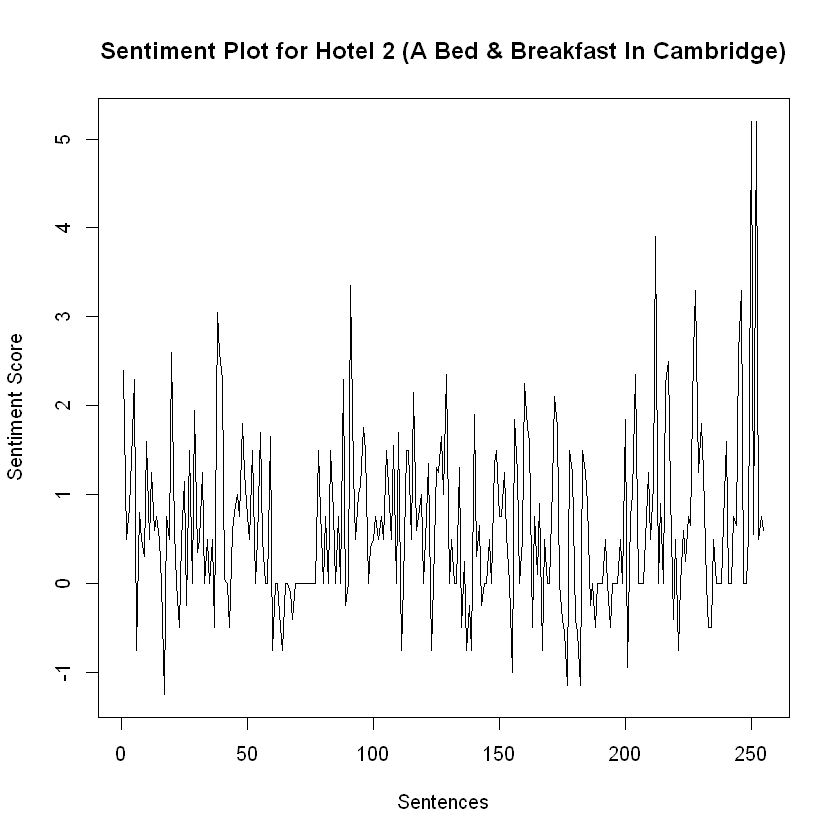

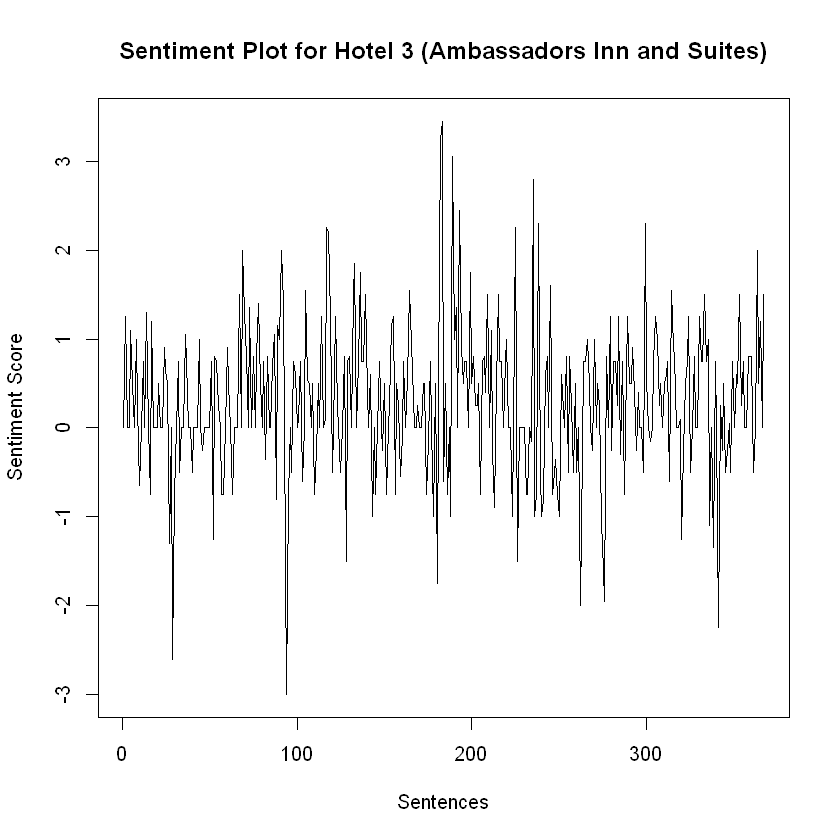

In [31]:
# Visualize the sentiments using the plot()
plot(sentiment_hotel1, type = "l", main = "Sentiment Plot for Hotel 1 (40 Berkeley Hostel)", xlab = "Sentences", ylab = "Sentiment Score")
plot(sentiment_hotel2, type = "l", main = "Sentiment Plot for Hotel 2 (A Bed & Breakfast In Cambridge)", xlab = "Sentences", ylab = "Sentiment Score")
plot(sentiment_hotel3, type = "l", main = "Sentiment Plot for Hotel 3 (Ambassadors Inn and Suites)", xlab = "Sentences", ylab = "Sentiment Score")


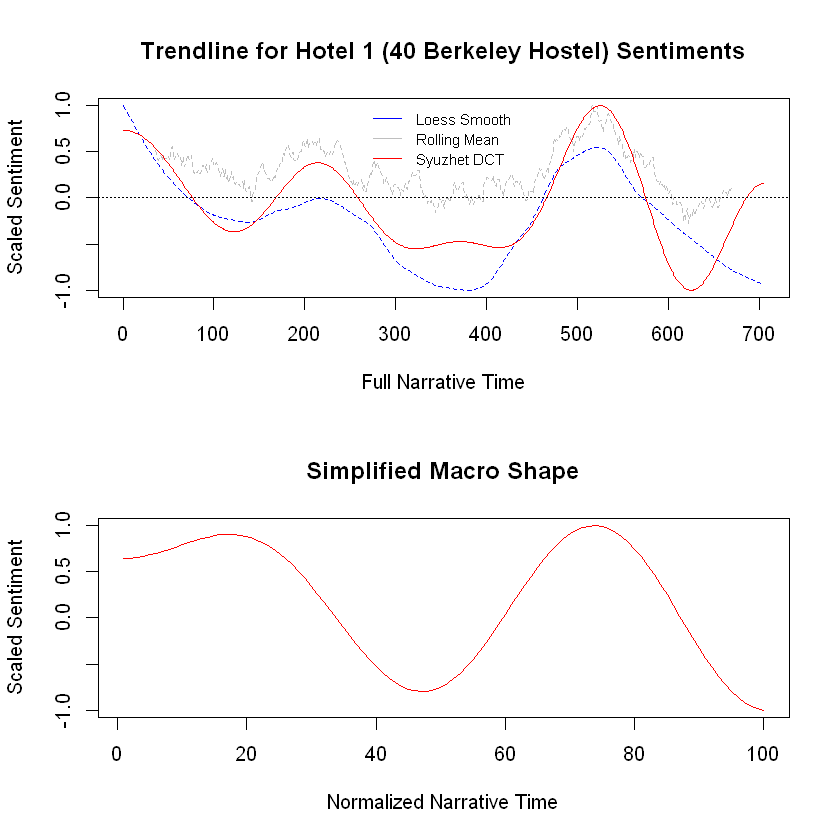

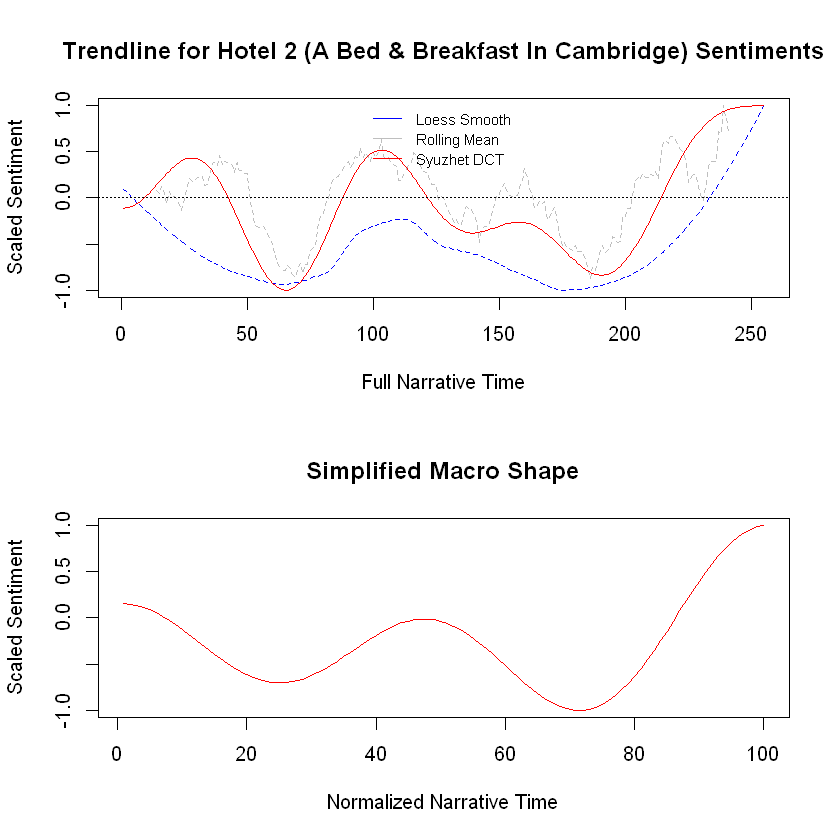

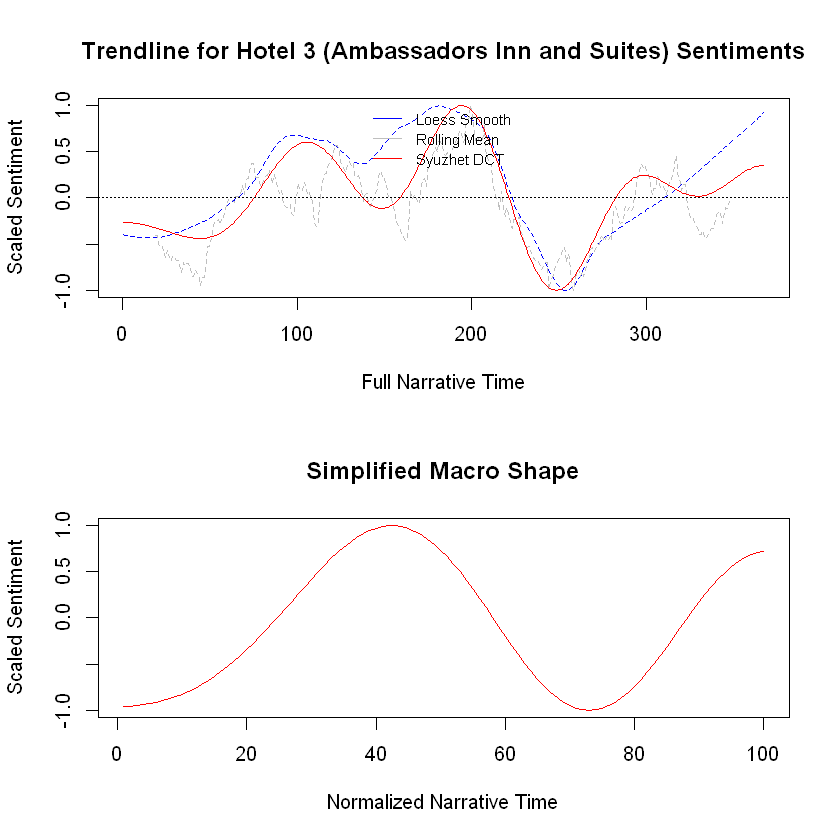

In [32]:
# Plot the trendlines of the sentiments for each hotel using the simple_plot() function and examine the resulting normalized normative time curves.
simple_plot(sentiment_hotel1, title = "Trendline for Hotel 1 (40 Berkeley Hostel) Sentiments")
simple_plot(sentiment_hotel2, title = "Trendline for Hotel 2 (A Bed & Breakfast In Cambridge) Sentiments")
simple_plot(sentiment_hotel3, title = "Trendline for Hotel 3 (Ambassadors Inn and Suites) Sentiments")

# Examination
# The simplified macro shape in the lower half of each graph represents a smoothed, normalized sentiment over the entire narrative time. This curve provides a high-level overview of the sentiment trends and allows for direct comparison of the hotels on a normalized timeline that spans their review sequences. The interpretations for each hotel are as follows:
# Hotel 1: The graph shows an initial dip in sentiment followed by a gradual rise, suggesting that as reviewers continue to describe their experiences, the sentiment improves slightly over time. However, the sentiment dips again later on, which could indicate inconsistency in the quality of experience at the hotel.
# Hotel 2: The sentiment trend exhibits a wave-like pattern with alternating periods of positivity and negativity, indicating cyclical changes in sentiment throughout the reviews. The fluctuations are more tightly bound compared to Hotels 1 and 3, and the trend rises to its highest level towards the end of the review sequence. This could suggest that the quality is becoming more consistent.
# Hotel 3: The sentiment reveals a pronounced upward trend, indicating that sentiment generally improves as the narrative progresses. However, there is a significant dip to its lowest level before rising again. This pattern is somewhat similar to Hotel 1 in terms of the magnitude of its oscillations, but unlike Hotel 1, Hotel 3 ends on a high phase, indicating a positive conclusion.


In [33]:
# Use the zoo library and the rollmean() function to compute the moving averages of sentiments for the three hotels.
ma_hotel1 <- rollmean(sentiment_hotel1, 5)
ma_hotel2 <- rollmean(sentiment_hotel2, 5)
ma_hotel3 <- rollmean(sentiment_hotel3, 5)


In [34]:
# Rescale the curves by using the x component of the (x,y,z) vector with values (0,1) returned by the rescale_x_2()
rescaled_hotel1 <- rescale_x_2(sentiment_hotel1)
rescaled_hotel2 <- rescale_x_2(sentiment_hotel2)
rescaled_hotel3 <- rescale_x_2(sentiment_hotel3)


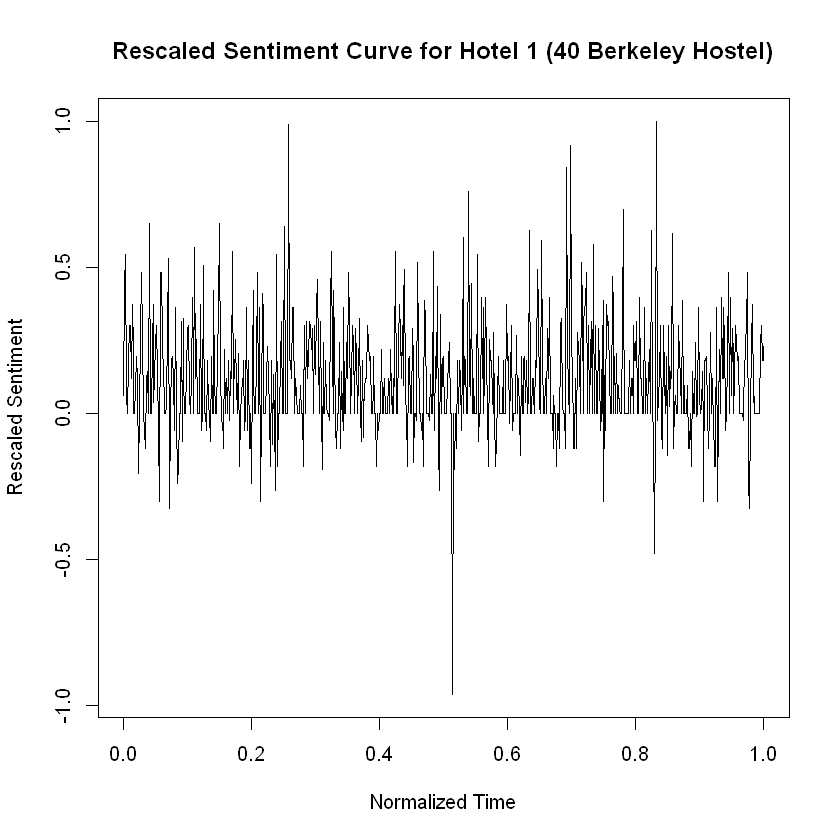

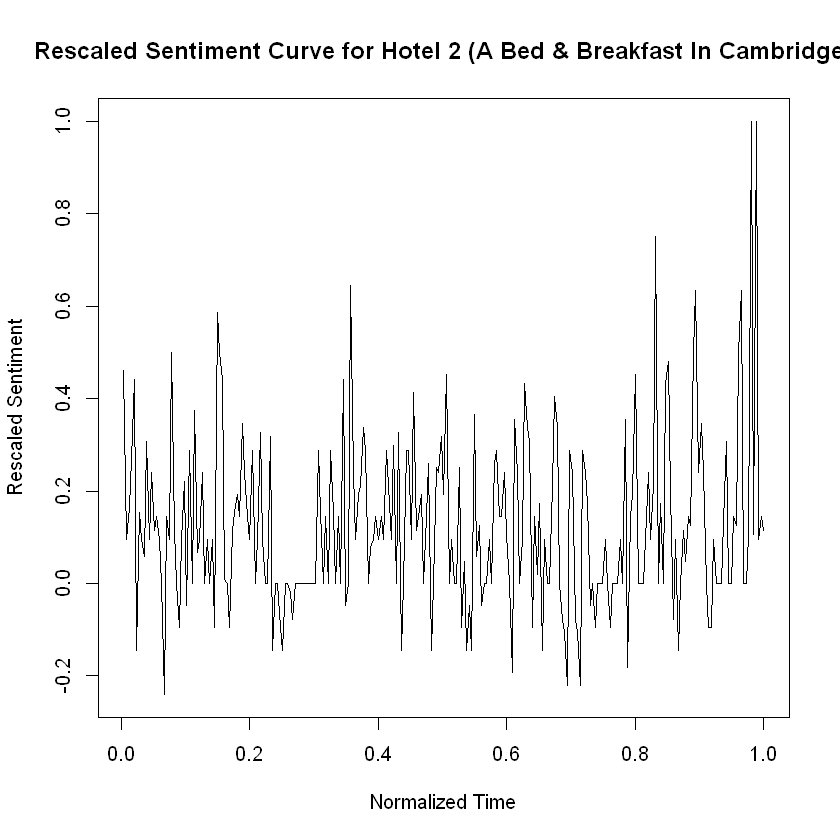

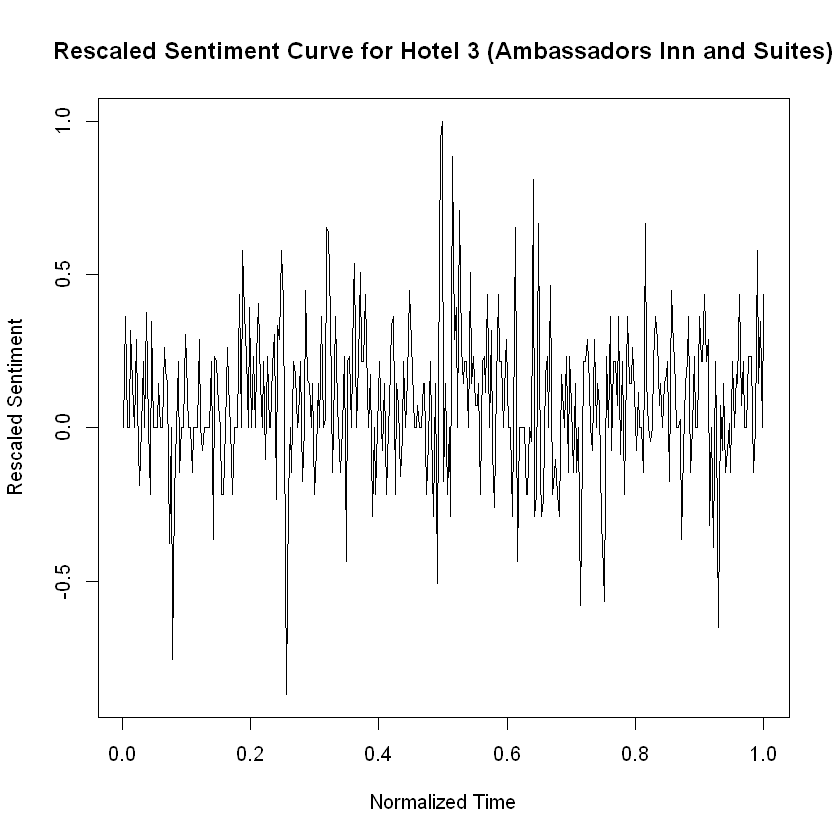

In [35]:
# Plot the rescales curves.
plot(rescaled_hotel1, type = "l", main = "Rescaled Sentiment Curve for Hotel 1 (40 Berkeley Hostel)", xlab = "Normalized Time", ylab = "Rescaled Sentiment")
plot(rescaled_hotel2, type = "l", main = "Rescaled Sentiment Curve for Hotel 2 (A Bed & Breakfast In Cambridge)", xlab = "Normalized Time", ylab = "Rescaled Sentiment")
plot(rescaled_hotel3, type = "l", main = "Rescaled Sentiment Curve for Hotel 3 (Ambassadors Inn and Suites)", xlab = "Normalized Time", ylab = "Rescaled Sentiment")


In [36]:
# 7 Interpret the results.
# Use the get_dct_transform() function, which produces smoothed results on a scale of 0 to 100.
dct_hotel1 <- get_dct_transform(sentiment_hotel1, low_pass_size = 5, x_reverse_len = 100, scale_range = TRUE)
dct_hotel2 <- get_dct_transform(sentiment_hotel2, low_pass_size = 5, x_reverse_len = 100, scale_range = TRUE)
dct_hotel3 <- get_dct_transform(sentiment_hotel3, low_pass_size = 5, x_reverse_len = 100, scale_range = TRUE)


In [37]:
# Compare the reviews by focusing on the shape of the vectors that represent the reviews. Use the method of cosine similarity to compare the vectors, more specifically the discrete cosine transform (DCT).
cos_sim_dct_12 <- cosine(as.vector(dct_hotel1), as.vector(dct_hotel2))
cos_sim_dct_13 <- cosine(as.vector(dct_hotel1), as.vector(dct_hotel3))
cos_sim_dct_23 <- cosine(as.vector(dct_hotel2), as.vector(dct_hotel3))

cat("Cosine Similarity between DCT of Hotel 1 and Hotel 2:", cos_sim_dct_12, "\n")
cat("Cosine Similarity between DCT of Hotel 1 and Hotel 3:", cos_sim_dct_13, "\n")
cat("Cosine Similarity between DCT of Hotel 2 and Hotel 3:", cos_sim_dct_23, "\n")


Cosine Similarity between DCT of Hotel 1 and Hotel 2: -0.718848 
Cosine Similarity between DCT of Hotel 1 and Hotel 3: -0.8682727 
Cosine Similarity between DCT of Hotel 2 and Hotel 3: 0.4505336 


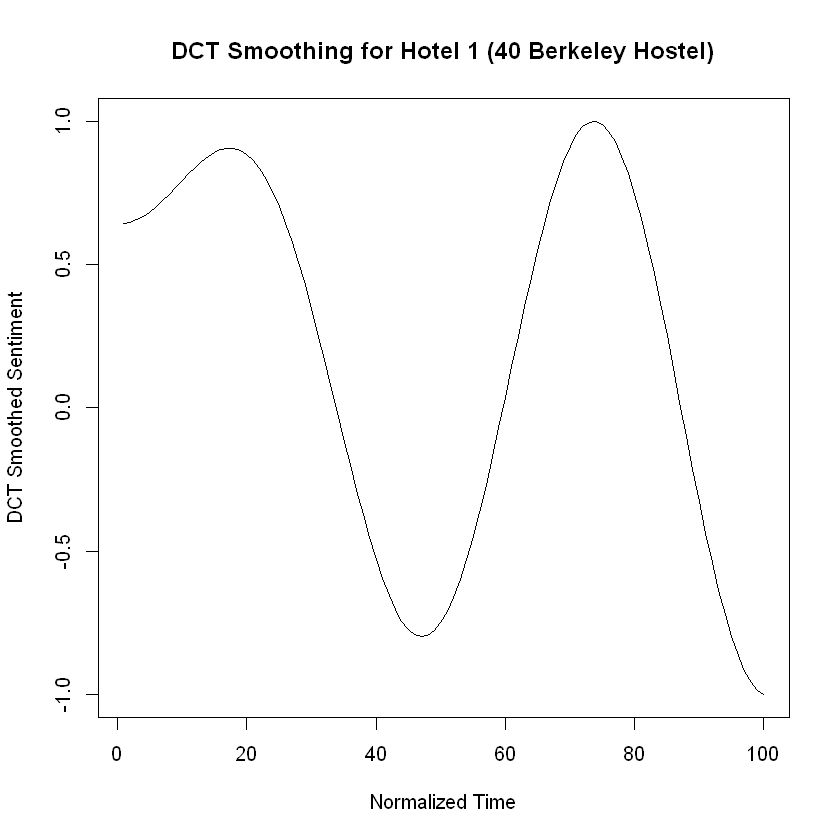

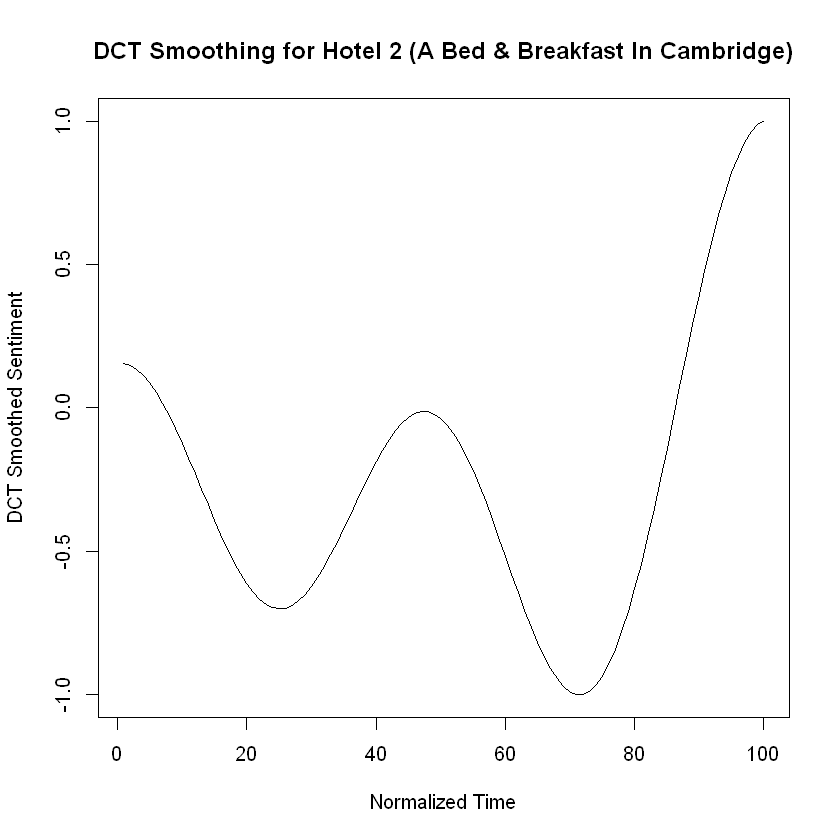

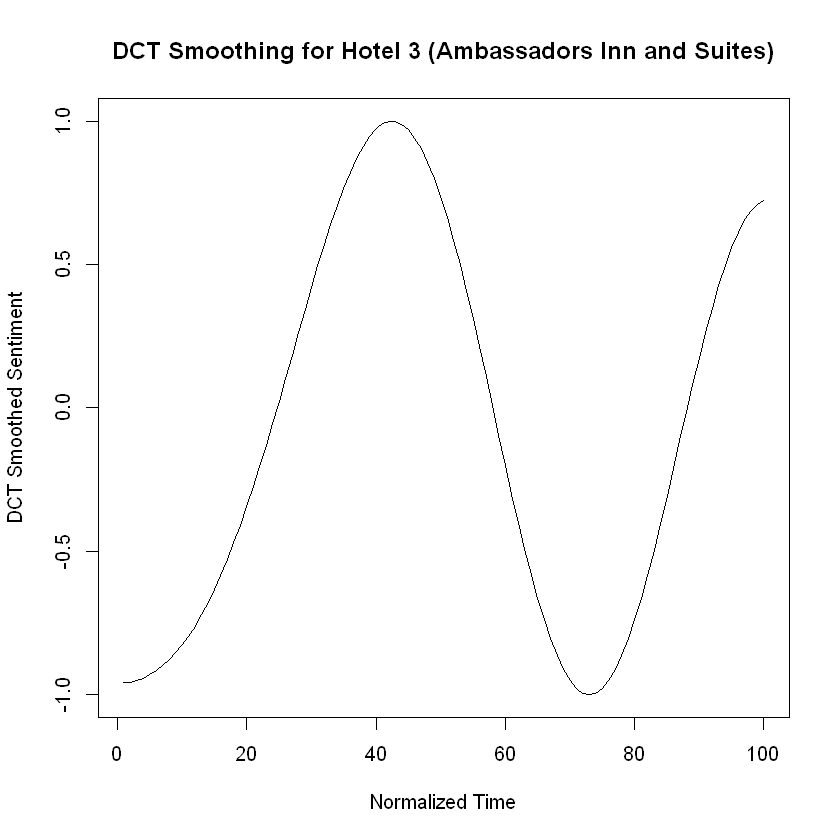

In [38]:
# Plot the DCT smoothing and time normalization for each hotel using the plot()
plot(dct_hotel1, type = "l", main = "DCT Smoothing for Hotel 1 (40 Berkeley Hostel)", xlab = "Normalized Time", ylab = "DCT Smoothed Sentiment")
plot(dct_hotel2, type = "l", main = "DCT Smoothing for Hotel 2 (A Bed & Breakfast In Cambridge)", xlab = "Normalized Time", ylab = "DCT Smoothed Sentiment")
plot(dct_hotel3, type = "l", main = "DCT Smoothing for Hotel 3 (Ambassadors Inn and Suites)", xlab = "Normalized Time", ylab = "DCT Smoothed Sentiment")


In [39]:
# Verify the length of each vector to confirm that it is 100 using the length()
length_dct_hotel1 <- length(dct_hotel1)
length_dct_hotel2 <- length(dct_hotel2)
length_dct_hotel3 <- length(dct_hotel3)

cat("Length of DCT Smoothed Sentiment Vector for Hotel 1 (40 Berkeley Hostel):", length_dct_hotel1, "\n")
cat("Length of DCT Smoothed Sentiment Vector for Hotel 2 (A Bed & Breakfast In Cambridge):", length_dct_hotel2, "\n")
cat("Length of DCT Smoothed Sentiment Vector for Hotel 3 (Ambassadors Inn and Suites):", length_dct_hotel3, "\n")


Length of DCT Smoothed Sentiment Vector for Hotel 1 (40 Berkeley Hostel): 100 
Length of DCT Smoothed Sentiment Vector for Hotel 2 (A Bed & Breakfast In Cambridge): 100 
Length of DCT Smoothed Sentiment Vector for Hotel 3 (Ambassadors Inn and Suites): 100 


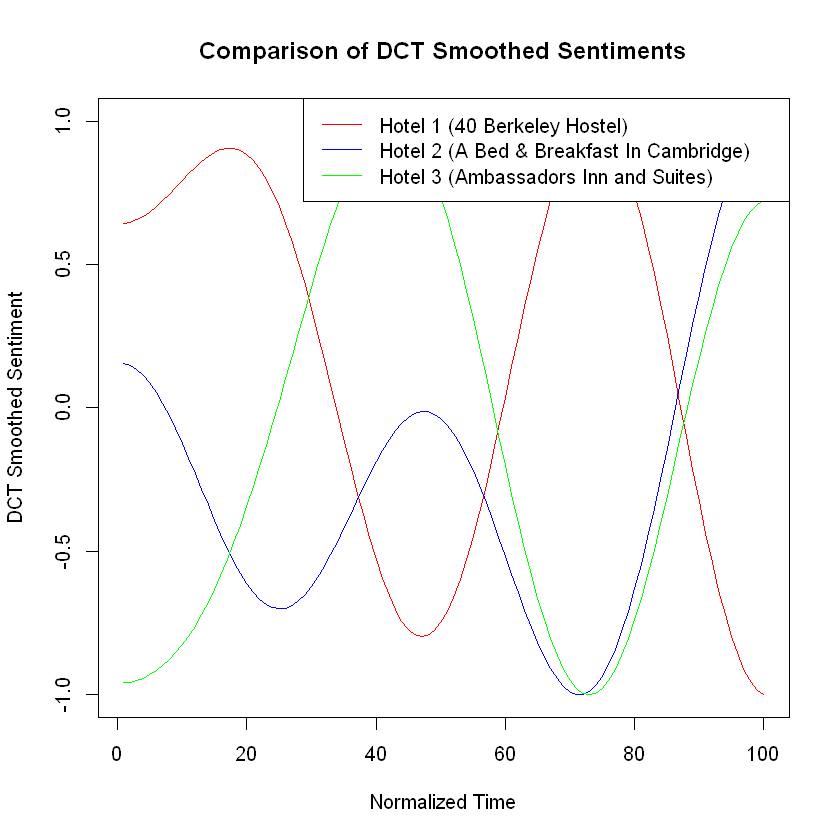

In [40]:
# Plot all three curves in one graph for easier visual comparison of their DCT smoothing and time normalization.
plot(dct_hotel1, type = "l", col = "red", ylim = c(min(c(dct_hotel1, dct_hotel2, dct_hotel3)), max(c(dct_hotel1, dct_hotel2, dct_hotel3))), main = "Comparison of DCT Smoothed Sentiments", xlab = "Normalized Time", ylab = "DCT Smoothed Sentiment")
lines(dct_hotel2, col = "blue")
lines(dct_hotel3, col = "green")
legend("topright", legend = c("Hotel 1 (40 Berkeley Hostel)", "Hotel 2 (A Bed & Breakfast In Cambridge)", "Hotel 3 (Ambassadors Inn and Suites)"), col = c("red", "blue", "green"), lty = 1)


In [41]:
# Calculate the correlation of each pair of vectors using the cor()
cor_hotel1_hotel2 <- cor(dct_hotel1, dct_hotel2)
cor_hotel1_hotel3 <- cor(dct_hotel1, dct_hotel3)
cor_hotel2_hotel3 <- cor(dct_hotel2, dct_hotel3)

cat("Correlation between Hotel 1 and Hotel 2 DCT Smoothed Sentiments:", cor_hotel1_hotel2, "\n")
cat("Correlation between Hotel 1 and Hotel 3 DCT Smoothed Sentiments:", cor_hotel1_hotel3, "\n")
cat("Correlation between Hotel 2 and Hotel 3 DCT Smoothed Sentiments:", cor_hotel2_hotel3, "\n")


Correlation between Hotel 1 and Hotel 2 DCT Smoothed Sentiments: -0.6961754 
Correlation between Hotel 1 and Hotel 3 DCT Smoothed Sentiments: -0.875713 
Correlation between Hotel 2 and Hotel 3 DCT Smoothed Sentiments: 0.4533065 


In [42]:
# 7.	Discuss the significance of these results to managers of the hotels reviewed.
#Cosine Similarity and Correlation Analysis:
# Cosine Similarity:
# - Hotel 1 and Hotel 2: The cosine similarity is approximately -0.719, indicating a relatively strong negative relationship between the sentiment patterns of these two hotels.
# - Hotel 1 and Hotel 3: The cosine similarity is approximately -0.868, indicating an even stronger negative relationship between these two hotels.
# - Hotel 2 and Hotel 3: The cosine similarity is approximately 0.451, suggesting a moderate positive relationship between these hotels' sentiment patterns.
# Correlation:
# - Hotel 1 and Hotel 2: The correlation is approximately -0.696, reinforcing the strong negative relationship observed in cosine similarity.
# - Hotel 1 and Hotel 3: The correlation is approximately -0.876, indicating a very strong negative relationship, which aligns with the cosine similarity result.
# - Hotel 2 and Hotel 3: The correlation is approximately 0.453, which shows a moderate positive relationship between these hotels, which aligns with the cosine similarity result.

# Interpretation:
# - Hotel 1 and Hotel 2 have a strong inverse relationship in terms of sentiment. This suggests that when one hotel is receiving positive reviews, the other is likely receiving more negative reviews, and vice versa. This could be due to differing service qualities, amenities, or customer expectations.
# -	Hotel 1 and Hotel 3 also have a strong inverse relationship. This pattern may indicate that these two hotels are perceived very differently by their respective customers, leading to contrasting sentiment patterns.
# - Hotel 2 and Hotel 3 show some degree of similarity, with a moderate positive relationship. This suggests that these hotels might have similar strengths and weaknesses as perceived by customers, possibly offering comparable experiences or targeting similar market segments.

# Significance for Managers:
# - The negative correlations between Hotel 1 and the other two hotels (Hotels 2 and 3) suggest that Hotel 1 stands out in terms of customer experience either positively or negatively. Managers at Hotel 1 could investigate why their sentiment trends are so distinct from the other two hotels. This could lead to improvements or leveraging their unique market position.
# - For Hotel 2 and Hotel 3, the moderate positive relationship suggests some overlap in their market appeal. Managers at these hotels should consider if they are competing for the same customer base and if there are opportunities to differentiate their offerings further.
# - Sentiment Analysis Patterns: The DCT-smoothed sentiment curves provide insights into how customer sentiment fluctuates over time, normalized across reviews. Hotel managers can use this information to pinpoint periods of high or low customer satisfaction, leading to more targeted improvements in service, marketing, or customer engagement.

# Overall, these results provide actionable insights that can help each hotel understand its unique position in the market relative to its competitors. By focusing on the strengths and weaknesses identified through sentiment analysis, managers can make data-driven decisions to enhance their offerings and customer satisfaction.


In [43]:
#8.	Ethical practices:
# Reflect on the possible abuses that might occur during the analysis, interpretation, and use of data and results.
# - When conducting sentiment analysis and network analysis, especially in a business context, several ethical concerns must be considered. The analysis and interpretation of data can be subject to biases, misinterpretations, and potential misuse, leading to decisions that may unfairly impact individuals or groups. Below are some potential abuses that could occur:
# 1. Algorithmic Bias in Sentiment Analysis: Algorithms used for sentiment analysis may be biased against certain linguistic patterns or dialects, leading to skewed results. For example, certain slang or informal language used by specific demographic groups might be incorrectly classified as negative or neutral, while the same sentiment expressed in more standard language is classified as positive. This could lead to unfairly negative assessments of feedback from certain groups of customers or employees.
# 2. Discriminatory Decision-Making: If the results of sentiment or network analysis are used to make decisions about promotions, bonuses, or layoffs, there is a risk that these decisions could be discriminatory if the analysis was biased or misinterpreted. For example, if certain demographic groups are more likely to use language that the sentiment analysis algorithm interprets as negative, these groups could be unfairly disadvantaged.
# 3. Overemphasis on Quantitative Metrics: Relying too heavily on quantitative metrics such as sentiment scores or centrality measures can lead to an overemphasis on these metrics at the expense of qualitative factors. For example, management might focus on boosting these scores rather than addressing underlying issues that are more complex and less easily quantifiable, such as cultural problems within the organization or deeper issues affecting customer satisfaction.
# 4. Misinterpretation of Centrality Measures: In network analysis, centrality measures such as degree, betweenness, and closeness centrality provide insights into the roles of individuals within a network. However, these measures can be misinterpreted if taken out of context. For example, a high degree of centrality might be seen as a sign of influence, but in reality, it might simply indicate a high volume of low-quality interactions. Misinterpreting these metrics could lead to incorrect evaluations of employee performance or influence within the company.
# 5. Violation of Privacy: In sentiment and network analysis, personal communications are analyzed to derive insights. If this data is not anonymized or if sensitive information is improperly handled, it could lead to violations of privacy. Employees might feel surveilled, leading to a breach of trust between them and the organization.

# Substantiate your reflection with concrete examples from your analysis and interpretation in a "what if" scenario.
# - Scenario 1: Misleading Marketing Campaigns: Suppose the sentiment analysis conducted on hotel reviews showed a high level of positivity. Based on this, the hotel management decides to launch a marketing campaign that heavily promotes their excellent customer service. However, the sentiment analysis algorithm misinterpreted cultural expressions in the reviews, leading to an overestimation of positive sentiments. As a result, the marketing campaign could backfire when customers find that their experiences do not match the advertised claims, damaging the hotel's reputation.
# - Scenario 1: Misleading Strategic Decisions Based on Manipulated Data: Imagine that a company wants to promote a new product and decides to use sentiment analysis to gauge public opinion. However, the marketing team manipulates the sentiment analysis by excluding negative reviews or weighting positive reviews more heavily. As a result, the company launches a massive marketing campaign based on the artificially inflated positive sentiment. When the product is released, the actual public response is overwhelmingly negative, leading to a failed product launch and significant financial losses.
# - Scenario 2: Misjudged Employee Performance: In the network analysis of employee communication, let's say that Jake is identified as having high betweenness centrality, indicating that he plays a key role as an intermediary in the organization. However, this metric does not account for the quality of Jake’s interactions, which are often superficial and unproductive. If management uses this metric to reward Jake with a promotion or bonus, it could lead to resentment among other employees who contribute more meaningfully to the organization, ultimately harming team morale.


In [44]:
# References

# ScienceDirect. (n.d.). Degree Centrality. Retrieved from https://www.sciencedirect.com/topics/computer-science/degree-centrality
# Analytics Vidhya. (2023, May 15). A Complete Tutorial on Time Series Modeling in R. Retrieved from https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
# ScienceDirect. (n.d.). Closeness Centrality. Retrieved from https://www.sciencedirect.com/topics/computer-science/closeness-centrality
# GeeksforGeeks. (2022, July 21). Betweenness Centrality (Centrality Measure). Retrieved from https://www.geeksforgeeks.org/betweenness-centrality-centrality-measure/
# R Documentation. (n.d.). Discrete Cosine Transform in R. Retrieved from https://search.r-project.org/CRAN/refmans/gsignal/html/dct.html
# Khalid, I. A. (2020, May 15). Introduction to time series analysis with R: From exploration, to forecasting. Towards Data Science. https://towardsdatascience.com/introduction-to-time-series-analysis-with-r-a2f97650baa3
# Innovative Clinical Neuroscience. (2020). Ethical challenges posed by big data. Innovative Clinical Neuroscience, 17(10-12), 24-30. https://doi.org/10.31083/j.rcm.2020.10.10.
# Finnstats. (2021, May 16). Sentiment analysis in R. R Bloggers. https://www.r-bloggers.com/2021/05/sentiment-analysis-in-r-3/